In [57]:
import numpy as np
import pandas as pd
from time import time
from glob import glob
import re
from typing import Final
from tqdm import tqdm
import matplotlib.pyplot as plt
import os


In [58]:
# 함수 정의

def read_file(file_name):
    # 파일 가져와야함
    title = pd.read_csv(file_name, nrows = 1).columns.tolist()
    comment = pd.read_csv(file_name, nrows = 1, skiprows =1).columns.tolist()

    data_num = int(re.findall(r'\d+', comment[0])[0])
    data = pd.read_csv(file_name, header=None, nrows = data_num, skiprows = 2, sep ='\t').to_numpy()

    # data cleasing
    x,y,z = data[:,0], data[:,1], data[:,2]
    u,v,w,p = data[:, 3], data[:,4], data[:,5], data[:,6]
    
    # x,y,z 좌표의 개수
    Nx, Ny, Nz = len(set(x)), len(set(y)), len(set(z))
    # dataset의 기준 좌표계와 numpy 좌표계의 차이가 있기 때문에 변환이 필요함

    u = u.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    u = np.transpose(u, (2,1,0))
   
    v = v.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    v = np.transpose(v, (2,1,0))
    
    w = w.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    w = np.transpose(w, (2,1,0))
    
    p = p.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    p = np.transpose(p, (2,1,0))

    x = x.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    x = np.transpose(x, (2,1,0))

    y = y.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    y = np.transpose(y, (2,1,0))

    z = z.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    z = np.transpose(z, (2,1,0))

    return (u, v, w, p, Nx, Ny, Nz,x,y,z)

def norm_data(data, vmin, vmax): # -1 ~ 1
    # 정규 분포로 만들고자 함.
    alpha = 2 / (vmax - vmin)
    norm_data = alpha * (data - vmin) - 1 
    return norm_data

def norm_data2(data, vmin, vmax):
    # 교수님이 만드신것
    alpha = 2 / (vmax - vmin)
    beta = -1 - alpha * vmin
    norm_data = alpha * data + beta
    return norm_data

def denorm_data(norm_data,vmin,vmax):
    alpha = 2/(vmax-vmin)
    data = (norm_data+1) / alpha + vmin
    return data

# 2차원 데이터를 plot 하는 함수
def plot_image(outfile,data,vmin,vmax): #outfile: 저장파일명, data: 2차원 데이터 행렬, vmin: colormap 최소값, vmax: colormap 최대값
    vel = re.findall(r"vel_(\d+\.\d+|\d+|\d+)", outfile)[0] # 파일명에서 경계속도값 추출
    filename = os.path.basename(outfile)
    filename = os.path.splitext(filename)[0]
    variable = filename[0]
    data_type = filename[2]
    start=time.time()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.imshow(data, cmap='jet', vmin=vmin,vmax=vmax)
    plt.tight_layout()
    plt.annotate('Initial U-Vel= ' + vel,xy=(0.05, 0.95), xycoords='axes fraction', fontsize=16)
    plt.annotate('Variable = ' + variable,xy=(0.05, 0.90), xycoords='axes fraction', fontsize=16)
    if data_type == 'i':
        plt.annotate('Initial Field',xy=(0.05, 0.85), xycoords='axes fraction', fontsize=16)
    elif data_type == 'p':
        plt.annotate('Pred. Result',xy=(0.05, 0.85), xycoords='axes fraction', fontsize=16)
    elif data_type == 'G':
        plt.annotate('Time-averaged GT Field',xy=(0.05, 0.85), xycoords='axes fraction', fontsize=16)
    else:
        pass

    fig.colorbar(im, orientation="vertical")
    plt.savefig(outfile)
    plt.close('all')
    end=time.time()
    dT = end-start

def read_file2(file_name): #outfile: 저장파일명, data: 2차원 데이터 행렬, vmin: colormap 최소값, vmax: colormap 최대값
    vel = re.findall(r"vel_(\d+\.\d+|\d+|\d+)", file_name)[0] # 파일명에서 경계속도값 추출
    return float(vel)


In [59]:
# Fortran 배열 설명
'''
cell_num = data_num
NyNz = list(Input_x).count(Input_x[0])
NxNz = list(Input_y).count(Input_y[0])
NxNy = list(Input_z).count(Input_z[0])
Nx,Ny,Nz = int(cell_num/NyNz), int(cell_num/NxNz), int(cell_num/NxNy)
print(Nx,Ny,Nz)

a = np.array([i for i in range(1,11)])
a = np.reshape(a, (5,2), order = 'F')
print(a)

b = np.array([(i%4)+1 for i in range(24)])
print(b)
b = np.reshape(b, (4,2,3), order = 'F')
print(b)
'''

"\ncell_num = data_num\nNyNz = list(Input_x).count(Input_x[0])\nNxNz = list(Input_y).count(Input_y[0])\nNxNy = list(Input_z).count(Input_z[0])\nNx,Ny,Nz = int(cell_num/NyNz), int(cell_num/NxNz), int(cell_num/NxNy)\nprint(Nx,Ny,Nz)\n\na = np.array([i for i in range(1,11)])\na = np.reshape(a, (5,2), order = 'F')\nprint(a)\n\nb = np.array([(i%4)+1 for i in range(24)])\nprint(b)\nb = np.reshape(b, (4,2,3), order = 'F')\nprint(b)\n"

In [60]:
TRAIN_DIR_NAME:Final = "/Users/bangseongjin/Downloads/ddfe/urban/Base_code/data/Train"
TEST_DIR_NAME:Final = "/Users/bangseongjin/Downloads/ddfe/urban/Base_code/data/Test"
MODEL_DIR_NAME:Final = "/Users/bangseongjin/Downloads/ddfe/urban/Base_code/data/Model"

In [69]:

train_start_time = time()

train_initial_file = sorted(glob(TRAIN_DIR_NAME + '/initial' + '/*.dat'))
train_mean_file = sorted(glob(TRAIN_DIR_NAME + '/mean' + '/*.dat'))

print(len(train_initial_file))
print(len(train_mean_file))

train_initial_u, train_mean_u = [], []
train_initial_v, train_mean_v = [], []
train_initial_w, train_mean_w = [], []
train_initial_p, train_mean_p = [], []

VTK = "/Users/bangseongjin/Downloads/ddfe/urban/Base_code/VTK"
for i in tqdm(range(len(train_initial_file))):
    
    # initial_value
    
    vel = read_file2(train_initial_file[i])
    train_initial_u.append(vel)

    # u,v,w,p,Nx,Ny,Nz,x,y,z = read_file(train_initial_file[i])
    # train_initial_u.append(u)
    # train_initial_v.append(v)
    # train_initial_w.append(w)
    # train_initial_p.append(p)

    # mean_value
    u,v,w,p,Nx,Ny,Nz,x,y,z = read_file(train_mean_file[i])
    train_mean_u.append(u)
    train_mean_v.append(v)
    train_mean_w.append(w)
    train_mean_p.append(p)
    # (7, 1,000,000) * 10
    # (126, 47, 185)


    # u,v,w,p

    # gridToVTK('/Users/bangseongjin/Downloads/ddfe/urban/Base_code/VTK'+'/mean_data'+str(i), x, y, z, pointData={'u': u, 'v': v, 'w': w, 'p': p})
    
    # pred = np.concatenate(())


10
10


100%|██████████| 10/10 [00:05<00:00,  1.80it/s]


### 건물 벽면 좌표값 계산하기

In [63]:
w1 = [60, 100]
w2 = [30, 60]
wall_section = [[[40,60], w1], [[60,90], w1], [[100, 125], w1], [[125, 150], w1], 
                [[40, 90], w2], [[100,125], w2], [[125, 145], w2]]

# 0 인 좌표값 찾기
import matplotlib.pyplot as plt
import numpy as np
u_shape = u.shape
print(u.shape)
wall_list = []

for i in range(u_shape[2]):
    for j in range(u_shape[1]):
        for w in range(u_shape[0]):
            if u[i][j][w] == 0:
                wall_list.append([i,j,w])
                '''
                wall_list3.append(w) # w좌표의 0값을 갖는 인덱스를   찾는다.
                wall_list2.append(j) # j좌표의 0값을 갖는 인덱스를 찾는다.
                wall_list1.append(i) # i좌표의 0값을 갖는 인덱스를 찾는다.
                '''

wall = [[] for i in range(7)]


for index, (w,i) in enumerate(wall_section):
    print(index) # j w i
    wall[index] = [x for x in wall_list if (w[0] < x[1] and x[1] < w[1]) and (i[0] < x[2] and x[2] < i[1])]

for i,j in enumerate(wall):
    print(f"{i}번째 건물의 shape", len(j))

wall1, wall2, wall3, wall4, wall5, wall6, wall7 = wall

wall1 = np.array(wall1)
wall2 = np.array(wall2)
wall3 = np.array(wall3)
wall4 = np.array(wall4)
wall5 = np.array(wall5)
wall6 = np.array(wall6)
wall7 = np.array(wall7)


p= np.array(p)

result = 0
print(np.max(wall1[:,0]))
for i in wall1:
    print(i)
    result += p[i]

# mean_wall1_pressure = sum(wall_list) / wall1.shape[0]


'''
행렬 사이즈가 달라서 하나의 numpy.array로 만들 수 없음
레거시 기능 사용 X
'''


(46, 185, 127)


IndexError: index 46 is out of bounds for axis 0 with size 46

(49670, 3)
(49670, 3)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144]
(47204, 3)
[[ 0 51 33]
 [ 1 51 33]
 [ 2 51 33]
 [ 3 51 33]
 [ 4 51 33]
 [ 5 51 33]
 [ 6 51 33]
 [ 7 51 33]
 [ 8 51 33]
 [ 0 52 33]
 [ 1 52 33]
 [ 2 52 33]
 [ 3 52 33]
 [ 4 52 33]
 [ 5 52 33]
 [ 6 52 33]
 [ 7 52 33]
 [ 8 52 33]
 [ 0 53 33]
 [ 1 53 33]
 [ 2 53 33]
 [ 3 53 33]
 [ 4 53 33]
 [ 5 53 33]
 [ 6 53 33]
 [ 7 53 33]
 [ 8 53 33]
 [ 0 54 33]
 [ 1 54 33]
 [ 2 54 33]
 [ 3 54 33]
 [ 4 54 33]
 [ 5 54 33]
 [ 6 54 33]
 [ 7 54 33]
 [ 8 54 33]
 [ 0 55 33]
 [ 1 55 33]
 [ 2 55 33]
 [ 3 55 33]

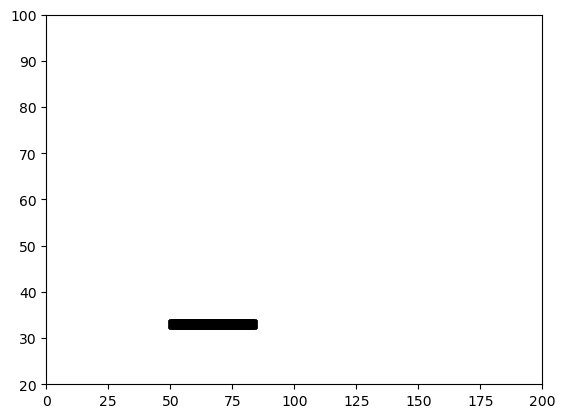

In [51]:
# 0 인 좌표값 찾기
import matplotlib.pyplot as plt

u_shape = u.shape
wall_list = []

for w in range(u_shape[2]):
    for j in range(u_shape[1]):
        for i in range(u_shape[0]):
            if u[i][j][w] == 0:
                wall_list.append([i,j,w])
                '''
                wall_list3.append(w) # w좌표의 0값을 갖는 인덱스를   찾는다.
                wall_list2.append(j) # j좌표의 0값을 갖는 인덱스를 찾는다.
                wall_list1.append(i) # i좌표의 0값을 갖는 인덱스를 찾는다.
                '''
# 교차점 없애기
wall_list = np.array(wall_list)
wall_list1 = np.copy(wall_list)

wall_list1[:,2] = wall_list1[:,2] - 1

print(wall_list1.shape)
print(wall_list.shape)
common_elements = np.intersect1d(wall_list1, wall_list)
print(common_elements)
# common rows로 인식되는 인덱스가 너무 많음
common_rows = np.intersect1d(wall_list1.view([('',wall_list1.dtype)]*wall_list1.shape[1]), 
                             wall_list.view([('',wall_list.dtype)]*wall_list.shape[1])).view(wall_list1.dtype).reshape(-1, wall_list1.shape[1])
print(common_rows.shape)

# 차집합을 구하는 과정
wall_list1_no_common = wall_list1[~np.isin(wall_list1, common_rows).all(1)]
wall_list_no_common = wall_list[~np.isin(wall_list, common_rows).all(1)]
print(wall_list1_no_common)

# result = np.setdiff1d(wall_list1[:,:], np.copy(wall_list[:,:]))

# x축 범위 설정
plt.xlim(0, 200)
plt.ylim(20, 100)

# 차원이 안맞는 에러
plt.scatter(wall_list1_no_common[:,1], wall_list1_no_common[:,2], marker= 's', c = 'k') # j, w
plt.show()

### W 좌표로 한단위씩 앞으로 당겨서 수치 측정

In [70]:
train_mean_u, train_initial_u = np.array(train_mean_u), np.array(train_initial_u)
train_mean_v = np.array(train_mean_v)
train_mean_w = np.array(train_mean_w)
train_mean_p = np.array(train_mean_p)

print(train_mean_u.shape)
print(train_initial_u.shape)

(10, 46, 185, 127)
(10,)


In [71]:
# mean file로 하는 이유는 mean 값의 u 만 변동하기 때문
# ex) 0.5의 경계속도를 지니는 initial_file 에서 min, max 를 추출하면 0.5 따라서 normalize 할 수 없음
umin, umax = np.min(train_mean_u), np.max(train_mean_u)
vmin, vmax = np.min(train_mean_v), np.max(train_mean_v)
wmin, wmax = np.min(train_mean_w), np.max(train_mean_w)
pmin, pmax = np.min(train_mean_p), np.max(train_mean_p)

In [72]:
# 학습 데이터 min-max normalization
train_mean_u, train_initial_u = norm_data(train_mean_u, umin, umax), norm_data(train_initial_u, umin, umax )
train_mean_v = norm_data(train_mean_v, vmin, vmax)
train_mean_w = norm_data(train_mean_w, wmin, wmax)
train_mean_p = norm_data(train_mean_p, pmin, pmax)


In [73]:
print(train_mean_u.shape)
print(train_initial_u.shape)

(10, 46, 185, 127)
(10,)


In [74]:
# 잘라내려고 하는 평면 xy평면으로 자르기

slice_idx = 85
train_initial_u = np.reshape(train_initial_u, (10,1))
train_mean_u = np.reshape(train_mean_u, (len(train_mean_file), -1))
train_mean_v = np.reshape(train_mean_v, (len(train_mean_file), -1))
train_mean_w = np.reshape(train_mean_w, (len(train_mean_file), -1))
train_mean_p = np.reshape(train_mean_p, (len(train_mean_file), -1))


In [75]:
print(train_mean_u.shape)
print(train_initial_u.shape)
print(train_initial_u)

(10, 1080770)
(10, 1)
[[-0.21745714]
 [-0.17257805]
 [-0.08281987]
 [-0.12769896]
 [ 0.09669649]
 [ 0.0518174 ]
 [ 0.27621284]
 [ 0.23133375]
 [ 0.4557292 ]
 [ 0.41085011]]


In [76]:
uA_inv = np.linalg.pinv(train_initial_u) @ train_mean_u
vA_inv = np.linalg.pinv(train_initial_u) @ train_mean_v
wA_inv = np.linalg.pinv(train_initial_u) @ train_mean_w
pA_inv = np.linalg.pinv(train_initial_u) @ train_mean_p
norm_variables = np.array([umin, umax, vmin, vmax, wmin, wmax, pmin, pmax])

In [77]:
MODEL_DIR_NAME:Final = "/Users/bangseongjin/Downloads/ddfe/urban/Base_code/data/Model/"
if not os.path.isdir(MODEL_DIR_NAME) and not os.path.exists(MODEL_DIR_NAME):
    os.mkdir(MODEL_DIR_NAME)

np.save(MODEL_DIR_NAME+'/uA_inv.npy', uA_inv)
np.save(MODEL_DIR_NAME+'/vA_inv.npy', vA_inv)
np.save(MODEL_DIR_NAME+'/wA_inv.npy', wA_inv)
np.save(MODEL_DIR_NAME+'/pA_inv.npy', pA_inv)
np.save(MODEL_DIR_NAME+"/norm_variables.npy", norm_variables)

In [81]:
import time
test_flag = 1
PLOT_DIR_NAME:Final = "/Users/bangseongjin/Downloads/ddfe/urban/Base_code/data/PLOT"

if test_flag:
    dir_path = MODEL_DIR_NAME
    if not os.path.exists(dir_path) and not os.path.isdir(dir_path):
        print('ERROR! No model found...\n Train first by changing train_flag to True')
        exit()

    print('Loading Model Matrices...')
    start = time.time()

    # 학습된 모델 불러오기
    uA_inv = np.load(MODEL_DIR_NAME+'/uA_inv.npy',mmap_mode='r')
    vA_inv = np.load(MODEL_DIR_NAME+'/vA_inv.npy',mmap_mode='r')
    wA_inv = np.load(MODEL_DIR_NAME+'/wA_inv.npy',mmap_mode='r')
    pA_inv = np.load(MODEL_DIR_NAME+'/pA_inv.npy',mmap_mode='r')
    end = time.time()
    dT = end-start
    print('Loaded Model Matrices... ('+str(round(dT,4))+' sec)')

    # 학습 데이터 min-max normalization에 이용된 min max 값들 불러오기
    norm_variables = np.load(MODEL_DIR_NAME+'/norm_variables.npy',mmap_mode='r')
    umin,umax = norm_variables[0],norm_variables[1]
    vmin,vmax = norm_variables[2],norm_variables[3]
    wmin,wmax = norm_variables[4],norm_variables[5]
    pmin,pmax = norm_variables[6],norm_variables[7]
    print('Model Matrices Loaded!')

    dir_path = PLOT_DIR_NAME + '/Test'
    if not os.path.exists(dir_path) and not os.path.isdir(dir_path):
        os.mkdir(dir_path)

    # 테스트 폴더 내 모든 데이터를 테스트
    data_f_file_list = sorted(glob(os.path.join(TEST_DIR_NAME+'/mean','*.dat')))
    data_i_file_list = sorted(glob(os.path.join(TEST_DIR_NAME+'/initial','*.dat')))
    
    
    '''
    for i,data_f_file in enumerate(data_f_file_list):
        print('Testing...', data_f_file)
        start = time.time()
        # 테스트 파일 불러오기
        uf,vf,wf,pf,Nx,Ny,Nz = read_file(data_f_file)

        ui,vi,wi,pi,_,_,_ = read_file(data_i_file_list[i])

        # 2차원 데이터 추출 및 테스트를 위한 데이터 shape 변경. 중간 평면을 학습하였기 때문에, slice_idx 는 Ny//2
        slice_idx = Ny//2
        ui_np, uf_np = ui[slice_idx].reshape(-1), uf[slice_idx].reshape(-1) # sliced in wall normal direction (1)
        vi_np, vf_np = vi[slice_idx].reshape(-1), vf[slice_idx].reshape(-1) # sliced in wall normal direction (1)
        wi_np, wf_np = wi[slice_idx].reshape(-1), wf[slice_idx].reshape(-1) # sliced in wall normal direction (1)
        pi_np, pf_np = pi[slice_idx].reshape(-1), pf[slice_idx].reshape(-1) # sliced in wall normal direction (1)

        # 테스트 데이터 min-max normalization
        norm_u = norm_data(ui_np,umin,umax) 

        # 테스트: 시간평균유동장 = 초기유동장 X 선형행렬 (단순 행렬곱)
        ur = np.matmul(norm_u,uA)
        print(ur.shape, norm_u.shape, uA.shape)
        vr = np.matmul(norm_u,vA) 
        wr = np.matmul(norm_u,wA)
        pr = np.matmul(norm_u,pA)
        end = time.time()
        dT = end-start
        print('Test Finished! ('+str(round(dT,4))+' sec)')
        #

        # 테스트결과 저장. 예측 결과(ur,vr,wr,pr)은 min-max normalize가되어 있는 상태로, 이를 denormalize 한 후, plot. 또한, 2차원 이미지로 plot 하기 위한 reshape 진행.
        filename = os.path.basename(data_f_file)
        filename = os.path.splitext(filename)[0]
        plot_image(PLOT_DIR_NAME+'/Test/u_init_'+filename+'.png', np.reshape(ui_np,(Nz,Nx)),umin,umax)
        plot_image(PLOT_DIR_NAME+'/Test/u_GT_'+filename+'.png', np.reshape(uf_np,(Nz,Nx)),umin,umax)
        plot_image(PLOT_DIR_NAME+'/Test/u_pred_'+filename+'.png', denorm_data(np.reshape(ur,(Nz,Nx)),umin,umax),umin,umax)
        plot_image(PLOT_DIR_NAME+'/Test/v_input_'+filename+'.png', np.reshape(vi_np,(Nz,Nx)),vmin,vmax)
        plot_image(PLOT_DIR_NAME+'/Test/v_GT_'+filename+'.png', np.reshape(vf_np,(Nz,Nx)),vmin,vmax)
        plot_image(PLOT_DIR_NAME+'/Test/v_pred_'+filename+'.png', denorm_data(np.reshape(vr,(Nz,Nx)),vmin,vmax),vmin,vmax)
        plot_image(PLOT_DIR_NAME+'/Test/w_input_'+filename+'.png', np.reshape(wi_np,(Nz,Nx)),wmin,wmax)
        plot_image(PLOT_DIR_NAME+'/Test/w_GT_'+filename+'.png', np.reshape(wf_np,(Nz,Nx)),wmin,wmax)
        plot_image(PLOT_DIR_NAME+'/Test/w_pred_'+filename+'.png', denorm_data(np.reshape(wr,(Nz,Nx)),wmin,wmax),wmin,wmax)
        plot_image(PLOT_DIR_NAME+'/Test/p_input_'+filename+'.png', np.reshape(pi_np,(Nz,Nx)),pmin,pmax)
        plot_image(PLOT_DIR_NAME+'/Test/p_GT_'+filename+'.png', np.reshape(pf_np,(Nz,Nx)),pmin,pmax)
        plot_image(PLOT_DIR_NAME+'/Test/p_pred_'+filename+'.png', denorm_data(np.reshape(pr,(Nz,Nx)),pmin,pmax),pmin,pmax)
        gridToVTK('./vtk/pred_'+filename, x, y, z, pointData = {"u" : ur, "v":vr, "w": wr, "p":pr, "surf":surf})

'''

Loading Model Matrices...
Loaded Model Matrices... (0.0089 sec)
Model Matrices Loaded!


In [80]:
test_initial_u, test_mean_u = [], []
test_initial_v, test_mean_v = [], []
test_initial_w, test_mean_w = [], []
test_initial_p, test_mean_p = [], []

for i in tqdm(range(len(data_f_file_list))):
    # pred = (7, 1,000,000) * 10 x,y,z,(u,v,w,p)
    # 테스트 파일 불러오기
    uf,vf,wf,pf,Nx,Ny,Nz,x,y,z = read_file(data_f_file_list[i])
    test_mean_u.append(uf)
    test_mean_v.append(vf)
    test_mean_w.append(wf)
    test_mean_p.append(pf)

    ui = read_file2(data_i_file_list[i])
    test_initial_u.append(ui)


100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


In [82]:
print(test_initial_u)

[0.25, 1.5, 1.75, 2.5, 2.75, 3.5, 3.75, 4.5, 4.75, 5.0]


In [83]:
test_mean_u, test_initial_u = np.array(test_mean_u), np.array(test_initial_u)
test_mean_v, test_initial_v = np.array(test_mean_v), np.array(test_initial_v)
test_mean_w, test_initial_w = np.array(test_mean_w), np.array(test_initial_w)
test_mean_p, test_initial_p = np.array(test_mean_p), np.array(test_initial_p)


In [84]:
# 학습 데이터 min-max normalization
test_mean_u, test_initial_u = norm_data(test_mean_u, umin, umax), norm_data(test_initial_u, umin, umax )
test_mean_v, test_initial_v = norm_data(test_mean_v, vmin, vmax), norm_data(test_initial_v, vmin, vmax )
test_mean_w, test_initial_w = norm_data(test_mean_w, wmin, wmax), norm_data(test_initial_w, wmin, wmax )
test_mean_p, test_initial_p = norm_data(test_mean_p, pmin, pmax), norm_data(test_initial_p, pmin, pmax )

In [85]:
print(test_mean_u.shape)
print(test_initial_u.shape)

(10, 46, 185, 127)
(10,)


In [86]:
slice_idx = Nx//2
test_initial_u = np.reshape(test_initial_u, (10,1)) # slice in wall normal direction
test_mean_u = np.reshape(test_mean_u, (len(data_f_file_list), -1))
test_mean_v = np.reshape(test_mean_v, (len(data_f_file_list), -1))
test_mean_w = np.reshape(test_mean_w, (len(data_f_file_list), -1))
test_mean_p = np.reshape(test_mean_p, (len(data_f_file_list), -1))

In [87]:
print(test_mean_u.shape)
print(test_initial_u.shape)
print(uA_inv.shape)

# file 로 읽을 때의 shape은 3차원공간이다. 그 때의 x,y,z 도 저장 

(10, 1080770)
(10, 1)
(1, 1080770)


# 시각화를 위한 행렬 파일 만들기

In [88]:


train_mean_file = sorted(glob(TRAIN_DIR_NAME + '/mean' + '/*.dat'))
_,_,_,_,_,_,_,x,y,z = read_file(train_mean_file[i])

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
z = z.reshape(-1, 1)
xyz = np.concatenate((x,y,z), axis = 1)

ur = test_initial_u @ uA_inv
vr = test_initial_u @ vA_inv
wr = test_initial_u @ wA_inv
pr = test_initial_u @ pA_inv

# ur = ur.transpose(1,0)
# vr = vr.transpose(1,0)
# wr = wr.transpose(1,0)
# pr = pr.transpose(1,0)

print(ur.shape)
pred_file = sorted(glob(MODEL_DIR_NAME + '/pred*.npy'))

for i in range(len(pred_file)):

    # (7, 1,000,000) * 10
    # (126, 47, 185)

    uvwp = np.concatenate((ur[i].reshape(len(ur[i]), 1), vr[i].reshape(len(vr[i]), 1), wr[i].reshape(len(wr[i]), 1), pr[i].reshape(len(wr[i]), 1)), axis = 1)
    xyzuvwp = np.concatenate((xyz, uvwp), axis = 1)

    np.save(MODEL_DIR_NAME+'/pred'+str(i)+'.npy', xyzuvwp, 'w') # x,y,z
    

(10, 1080770)


In [90]:
np.save(MODEL_DIR_NAME+'/ur_inv.npy', ur)
np.save(MODEL_DIR_NAME+'/vr_inv.npy', vr)
np.save(MODEL_DIR_NAME+'/wr_inv.npy', wr)
np.save(MODEL_DIR_NAME+'/pr_inv.npy', pr)

In [91]:
for i in range(len(pred_file)):
    data = np.load(pred_file[i])

    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    u = data[:,3]
    v = data[:,4]
    w = data[:,5]
    p = data[:,6]

    u = u.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    u = np.transpose(u, (2,1,0))
    
    v = v.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    v = np.transpose(v, (2,1,0))
    
    w = w.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    w = np.transpose(w, (2,1,0))
    
    p = p.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    p = np.transpose(p, (2,1,0))

    x = x.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    x = np.transpose(x, (2,1,0))

    y = y.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    y = np.transpose(y, (2,1,0))

    z = z.reshape((Nx, Nz, Ny), order = 'F')
    # transpose 는 행렬곱을 해주기위함
    z = np.transpose(z, (2,1,0))

    print(x.shape)
  


(46, 185, 127)
(46, 185, 127)
(46, 185, 127)
(46, 185, 127)
(46, 185, 127)
(46, 185, 127)
(46, 185, 127)
(46, 185, 127)
(46, 185, 127)
(46, 185, 127)


In [92]:
print(ur)
print(ur.shape)
print(test_initial_u)


[[ 0.11844165  0.07874571  0.05152253 ... -0.27151821 -0.27108208
  -0.26981018]
 [ 0.01712981  0.01138872  0.00745153 ... -0.03926874 -0.03920566
  -0.03902171]
 [-0.00313256 -0.00208268 -0.00136268 ...  0.00718115  0.00716962
   0.00713598]
 ...
 [-0.22601861 -0.15026805 -0.09831888 ...  0.51812999  0.51729773
   0.5148706 ]
 [-0.24628098 -0.16373945 -0.10713308 ...  0.56457988  0.56367301
   0.56102829]
 [-0.26654335 -0.17721085 -0.11594729 ...  0.61102977  0.61004829
   0.60718598]]
(10, 1080770)
[[-0.26233623]
 [-0.03794078]
 [ 0.00693831]
 [ 0.14157558]
 [ 0.18645467]
 [ 0.32109193]
 [ 0.36597102]
 [ 0.50060829]
 [ 0.54548738]
 [ 0.59036647]]


In [2]:
print("u 평균절대오차 : ", np.mean(np.abs(denorm_data(test_mean_u, umin, umax) - denorm_data(ur, umin, umax))))
print("v 평균절대오차 : ", np.mean(np.abs(denorm_data(test_mean_v, vmin, vmax) - denorm_data(vr, vmin, vmax))))
print("w 평균절대오차 : ", np.mean(np.abs(denorm_data(test_mean_w, wmin, wmax) - denorm_data(wr, wmin, wmax))))
print("p 평균절대오차 : ", np.mean(np.abs(denorm_data(test_mean_p, pmin, pmax) - denorm_data(pr, pmin, pmax))))

print(train_mean_u.shape)
MAE_u = []
for i in range(10):
    error_u = np.mean(np.abs(denorm_data((test_mean_u[i], umin, umax) - denorm_data(ur[i], umin, umax)) / denorm_data(ur[i], umin, umax)))
    MAE_u.append(error_u)

plt.plot(denorm_data(test_initial_u, umin, umax), MAE_u)
plt.show()
print(MAE_u)

NameError: name 'np' is not defined

In [94]:
SST = np.mean(np.power(denorm_data(test_mean_u, umin, umax) - denorm_data(np.mean(test_mean_u), umin, umax), 2)) # 평균 제곱오차
SSR = np.mean(np.power(denorm_data(ur, umin, umax) - denorm_data(np.mean(test_mean_u), umin, umax), 2)) # 평균 제곱오차
R = SSR / SST
print("결정계수 : ", R)

결정계수 :  0.8178825027396482


In [162]:
filename = 'test_case2_vel_5_data_file_set_000000000.dat'

plot_image(PLOT_DIR_NAME+'/u_'+filename+'.png', denorm_data(np.reshape(ur[-1, :],(Ny,Nz)),umin,umax),umin,umax)
filename = 'test_case2_vel_5_data_file_set_000000000.dat'
plot_image(PLOT_DIR_NAME+'/v_'+filename+'.png', denorm_data(np.reshape(vr[-1, :],(Ny,Nz)),vmin,vmax),vmin,vmax)
filename = 'test_case2_vel_5_data_file_set_000000000.dat'
plot_image(PLOT_DIR_NAME+'/w_'+filename+'.png', denorm_data(np.reshape(wr[-1, :],(Ny,Nz)),wmin,wmax),wmin,wmax)



In [161]:
print(ur[-1, :].shape)

(8510,)


In [ ]:
title = ['u', 'v', 'w', 'p']

dict_data = {}
for i in title:
    dict_data[i] = []

for i in tqdm(range(len(train_initial_file))):
    for data, t in enumerate(title):
        dict_data[t].append(read_file(train_initial_file[i])[data])

print(dict_data)

  0%|          | 0/10 [00:00<?, ?it/s]

127 46 185
127 46 185
127 46 185


 10%|█         | 1/10 [00:02<00:20,  2.28s/it]

127 46 185
127 46 185
127 46 185
127 46 185


 20%|██        | 2/10 [00:04<00:18,  2.26s/it]

127 46 185
127 46 185
127 46 185
127 46 185


 30%|███       | 3/10 [00:06<00:15,  2.23s/it]

127 46 185
127 46 185
127 46 185
127 46 185


 40%|████      | 4/10 [00:08<00:13,  2.22s/it]

127 46 185
127 46 185
127 46 185
127 46 185


 50%|█████     | 5/10 [00:11<00:11,  2.22s/it]

127 46 185
127 46 185
127 46 185
127 46 185


 60%|██████    | 6/10 [00:13<00:08,  2.21s/it]

127 46 185
127 46 185
127 46 185
127 46 185


 70%|███████   | 7/10 [00:15<00:06,  2.21s/it]

127 46 185
127 46 185
127 46 185
127 46 185


 80%|████████  | 8/10 [00:17<00:04,  2.21s/it]

127 46 185
127 46 185
127 46 185
127 46 185


 90%|█████████ | 9/10 [00:19<00:02,  2.21s/it]

127 46 185
127 46 185
127 46 185
127 46 185


100%|██████████| 10/10 [00:22<00:00,  2.22s/it]

127 46 185
{'u': [array([[[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]],

       [[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]],

       [[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]],

       ...,

       [[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 

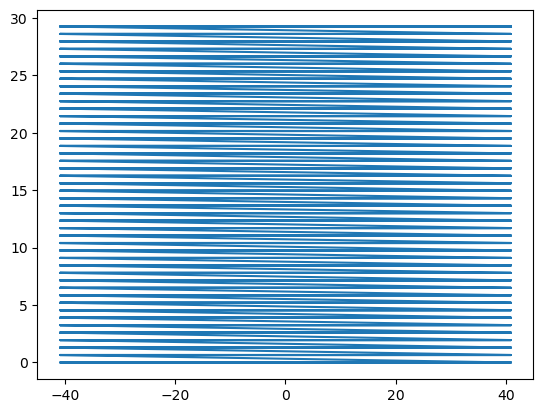

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Input_x,Input_y)
plt.show()


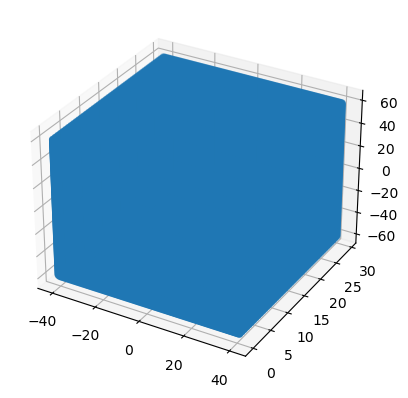

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter3D(Input_x, Input_y, Input_z)
plt.show()


In [ ]:
import pandas
import numpy as np

filename = "/Users/bangseongjin/Desktop/ddfe/urban/Base_code/data/Train/initial/test_case2_vel_0.5_data_file_set_000000000.dat"

header = pd.read_csv(filename, nrows=1).columns.tolist()
txt = pd.read_csv(filename, skiprows=1, nrows=1).columns.tolist()[0]
cell_num = int(re.findall(r'\d+', txt)[0])
df = pd.read_csv(filename, sep='\t', header=None, skiprows=2, nrows = cell_num).to_numpy()
x,y,z = df[:,0], df[:,1], df[:,2]


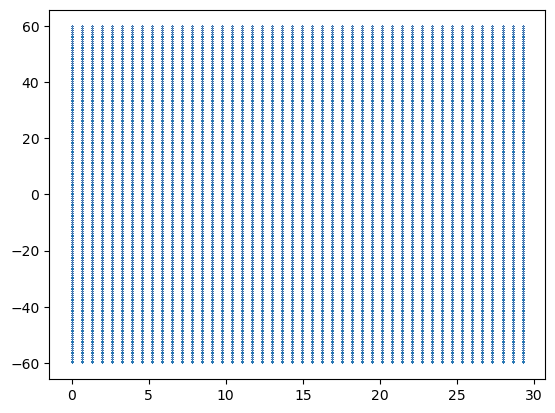

In [ ]:
# y,z
plt.scatter(y,z, s = 1e-4)
plt.show()

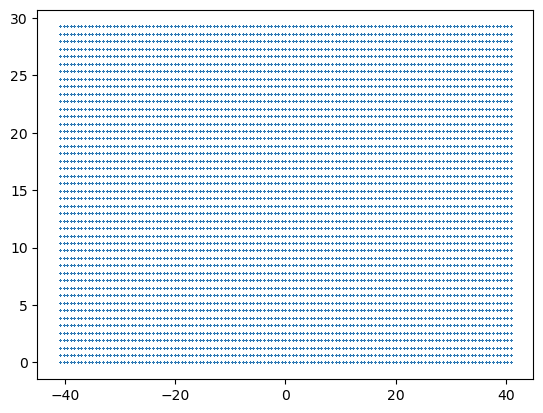

In [ ]:
# x,z
plt.scatter(x,y,s = 1e-4)
plt.show()
